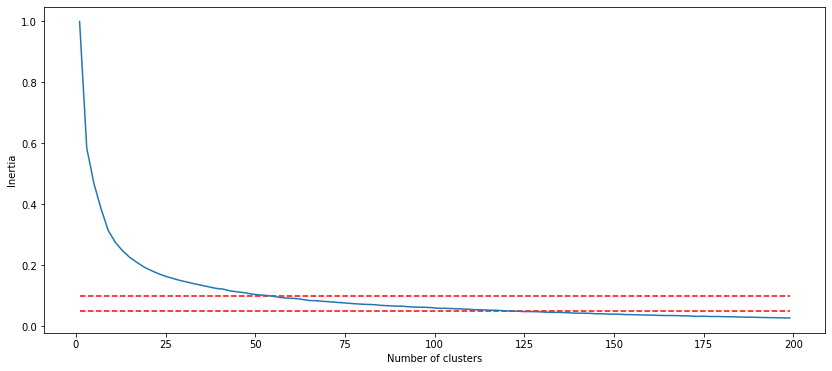

In [10]:
# loading data

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

X = data.data

#creating a shuffle

from sklearn.utils import shuffle

X_shuffled = shuffle(X , random_state=0)

#preprocessing data for clustering 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xt = scaler.fit_transform(X_shuffled[:500])

#importing clusters

from sklearn.cluster import KMeans

#cluster range
number_of_clusters = range(1,200,2)
inertia = []

for n in number_of_clusters:
    kmeans = KMeans(n_clusters = n)
    kmeans.fit(Xt)
    inertia.append(kmeans.inertia_)
    
#plotting results
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[14,6])
plt.plot(number_of_clusters , inertia/inertia[0])
plt.hlines(0.1 , number_of_clusters[0] , number_of_clusters[-1], 'r' , linestyle = 'dashed')
plt.hlines(0.05 , number_of_clusters[0] , number_of_clusters[-1] , 'r' , linestyle = 'dashed')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show();

In [2]:
# Observation: Optimum number f clusters found between 50-100

# Elongated clusters

In [3]:
from sklearn.datasets import make_blobs
import numpy as np

def elongated_clusters(clustering = None):
    X,_ = make_blobs(n_samples=300 , n_features = 2 , cluster_std=0.5 , random_state=0)
    
    #elongating the data
    Xt = np.dot(X , [[0.6 , -0.64] , [-0.4 ,0.9]])
    
    #algos
    if clustering is None:
        plt.scatter(*Xt.T , cmap='viridis')
        
    else:
        kmeans = KMeans(n_clusters=3)
        kmeans.fit(Xt)
        clusters = kmeans.predict(Xt)
        plt.scatter(*Xt.T , c=clusters , cmap='viridis')
        
from ipywidgets import interact

interact(elongated_clusters , clustering=[None , 'kmeans'])
    

interactive(children=(Dropdown(description='clustering', options=(None, 'kmeans'), value=None), Output()), _do…

<function __main__.elongated_clusters(clustering=None)>

# Gaussian Mixture Models

<Figure size 1008x432 with 0 Axes>

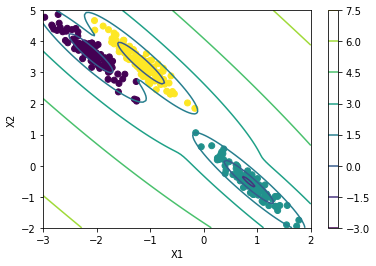

<Figure size 1008x432 with 0 Axes>

In [4]:
X,_ = make_blobs(n_samples=300 , n_features = 2 , cluster_std=0.5 , random_state=0)

Xt = np.dot(X , [[0.6 , -0.65] , [-0.4 , 0.9]])

from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3 , covariance_type = 'full')
gm.fit(Xt)
clusters = gm.predict(Xt)

xlims = [-3 , 2]
ylims = [-2 , 5]

X1 , X2 = np.meshgrid(np.linspace(*xlims , 100) , np.linspace(*ylims , 100))

proba = gm.score_samples(np.hstack((X1.reshape(-1,1) , (X2.reshape(-1,1)))))

plt.contour(X1 , X2 , np.log(-proba.reshape(100,100)))
plt.colorbar()
plt.xlim(xlims)
plt.ylim(ylims)

plt.scatter(*Xt.T , c = clusters , cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.figure(figsize=[14,6])

In [5]:
# Gaussian Mixture has successfully solved the issue

# Using Silhouette Score

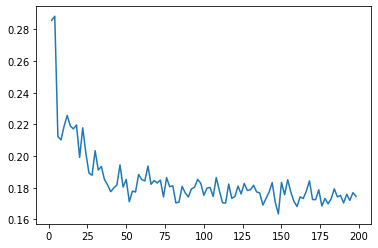

In [6]:
X = data.data

#creating a shuffle

from sklearn.utils import shuffle

X_shuffled = shuffle(X , random_state=0)

#preprocessing data for clustering 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xt = scaler.fit_transform(X_shuffled[:500])

#training

from sklearn.cluster import KMeans
from sklearn import metrics

no_clusters = range(2,200,2)
silhouette = []

for n in no_clusters:
    kmeans = KMeans(n_clusters = n)
    kmeans.fit(Xt)
    labels = kmeans.predict(Xt)
    score = metrics.silhouette_score(Xt , labels)
    silhouette.append(score)
    
plt.plot(no_clusters , silhouette)


# Choosing optimum number of components for GMM 

In [7]:
#defining a function
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture


def plot_gmm(X_train , X_test):
    scaler = StandardScaler()
    X_train  = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    log_likelihood_train = []
    log_likelihood_test = []
    bic = []
    
    #range for components
    no_components = range(2,60,1)
    
    for n in no_components:
        gmm = GaussianMixture(n_components = n)
        gmm.fit(X_train)
        
        log_likelihood_train.append(gmm.score(X_train))
        log_likelihood_test.append(gmm.score(X_test))
        bic.append(gmm.bic(X_train))
        
        
    #plotting results
    
    fig , ax1 = plt.subplots()
    
    ax1.plot(no_components , log_likelihood_train)
    ax1.plot(no_components , log_likelihood_test)
    ax1.set_xlabel('clusters')
    ax1.set_ylabel('Log Likelihood')
    ax1.legend(['train' , 'test'])
    
    ax2 = ax1.twinx()
    ax2.plot(no_components , bic)
        
    
    

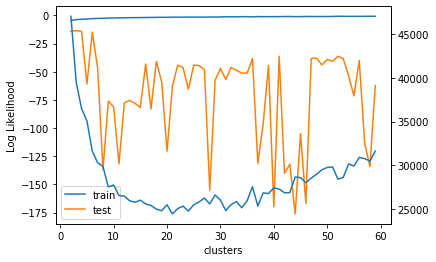

In [9]:
plot_gmm(X_shuffled[:5000] , X_shuffled[5000:7000])

In [11]:
# printing results

import pandas as pd

data = { 'Metric_Used':['Inertia' , 'Silouette' , 'BIC'] , 'Optimum no.of Clusters range': ['50-100' , '5-50' , '10-40']}

df = pd.DataFrame(data)

In [12]:
df

,Metric_Used,Optimum no.of Clusters range
0,Inertia,50-100
1,Silouette,5-50
2,BIC,10-40
